In [1]:
using PyPlot
using MARGO

## Initialize model

In [2]:
dt = 1.
t = Array(2020:dt:2100);

Econ = Economics(t)
Econ.mitigate_init = 0.

model = ClimateModel(
    "soldatenko",
    t,
    dt,
    MARGO.present_year,
    Econ,
    Physics(),
    MARGO.init_zero_controls(t)
);

In [3]:
optimize_controls!(
    model,
    obj_option = "temp",
    temp_goal = MARGO.δT_init+1.0,
    temp_final = MARGO.δT_init,
    max_deployment=Dict("remove"=>0., "mitigate"=>0., "geoeng"=>1., "adapt"=>0.),
    start_deployment=Dict("remove"=>2020., "mitigate"=>2020., "geoeng"=>2020., "adapt"=>2020.),
);


******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt
******************************************************************************

Solve_Succeeded


### Plotting the optimal solution state

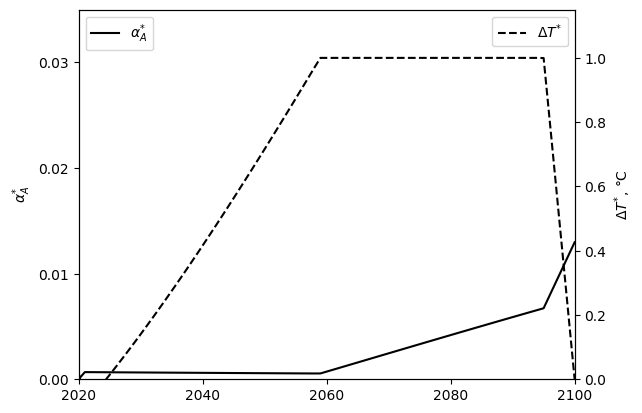

PyObject <matplotlib.legend.Legend object at 0x162cbc5c0>

In [4]:
figure(figsize=(4,4))

fig, ax1 = plt.subplots()
S0 = 1361.
ax1.plot(model.domain, (model.controls.geoeng*8.5)*4/S0, "k-", label=L"$\alpha_{A}^{*}$")
ax1.set_xlabel("")
ax1.set_ylabel(L"$\alpha_{A}^{*}$")
ax1.set_xticks([2020, 2040, 2060, 2080, 2100])
ax1.set_yticks([0, 0.01, 0.02, 0.03])
ax1.set_xlim([2020, 2100])
ax1.set_ylim([0,0.035])
legend(loc="upper left")

ax2 = ax1.twinx()
ax2.plot(model.domain, MARGO.δT(model) .- MARGO.δT_init, "k--", label=L"$\Delta T^{*}$")
ax2.set_ylim([0, 1.15])
ax2.set_ylabel(L"$\Delta T^{*}$, $\degree$C")
ax2.set_xlim([2020, 2100])

legend()
#savefig("../figures/replicate_Soldatenko.pdf", bbox_inches="tight", dpi=150)